In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [42]:
df = pd.read_csv('pca_speed.csv')
print(df.columns)
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df.columns)
df.head()

Index(['file idx', ' seed point idx', ' point count', ' time cov',
       ' time svd'],
      dtype='object')
Index(['file idx', 'seed point idx', 'point count', 'time cov', 'time svd'], dtype='object')


,file idx,seed point idx,point count,time cov,time svd
0,34,0,452,0.001957,0.000161
1,34,1,452,0.000284,0.000122
2,34,2,454,0.000386,0.000158
3,34,3,461,0.000270,0.000116
4,34,4,456,0.000255,0.000111


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file idx        3612 non-null   int64  
 1   seed point idx  3612 non-null   int64  
 2   point count     3612 non-null   int64  
 3   time cov        3612 non-null   float64
 4   time svd        3612 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 141.2 KB


In [44]:
df.describe()

,file idx,seed point idx,point count,time cov,time svd
count,3612.000000,3612.00000,3612.000000,3612.000000,3612.000000
mean,24.252492,165.60742,300.928295,0.000146,0.000073
std,12.636841,121.44420,339.473124,0.000119,0.000031
min,0.000000,0.00000,10.000000,0.000081,0.000043
25%,16.000000,67.00000,32.000000,0.000097,0.000051
50%,33.000000,135.00000,283.500000,0.000120,0.000065
75%,34.000000,243.25000,418.000000,0.000158,0.000084
max,34.000000,525.00000,3945.000000,0.005408,0.000475


In [65]:
# micro seconds
df["cov mu s"] = df["time cov"] * 1e6
df["svd mu s"] = df["time svd"] * 1e6
df.describe()

,file idx,seed point idx,point count,time cov,time svd,cov mu s,svd mu s
count,3612.000000,3612.00000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000
mean,24.252492,165.60742,300.928295,0.000146,0.000073,145.526225,73.165857
std,12.636841,121.44420,339.473124,0.000119,0.000031,119.479015,31.175704
min,0.000000,0.00000,10.000000,0.000081,0.000043,81.300735,42.915344
25%,16.000000,67.00000,32.000000,0.000097,0.000051,96.559525,50.783157
50%,33.000000,135.00000,283.500000,0.000120,0.000065,119.924545,64.849854
75%,34.000000,243.25000,418.000000,0.000158,0.000084,158.429146,83.923340
max,34.000000,525.00000,3945.000000,0.005408,0.000475,5408.287048,475.168228


In [45]:
# Wide to long
df2 = df.melt(
    id_vars=['file idx', 'seed point idx', 'point count'],
    var_name='method',
    value_name='time'
    )

df2.head()

,file idx,seed point idx,point count,method,time
0,34,0,452,time cov,0.001957
1,34,1,452,time cov,0.000284
2,34,2,454,time cov,0.000386
3,34,3,461,time cov,0.000270
4,34,4,456,time cov,0.000255


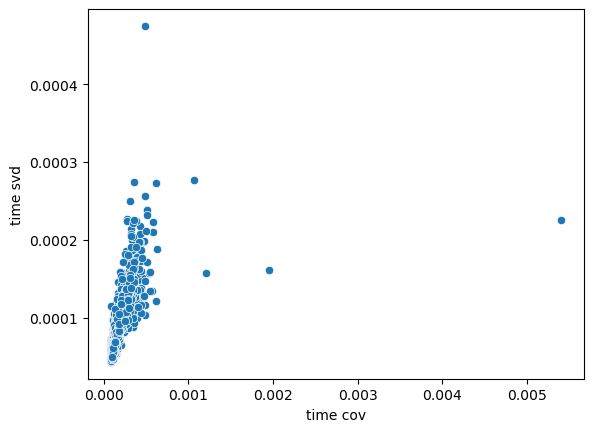

In [46]:
ax = sns.scatterplot(data=df, x='time cov', y='time svd')
#ax.set_aspect('equal')

<Axes: xlabel='point count', ylabel='time'>

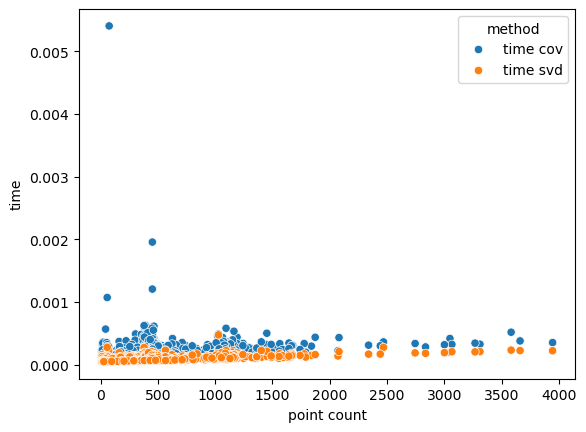

In [47]:
sns.scatterplot(data=df2, x='point count', y='time', hue='method')

[(0.0, 0.0007)]

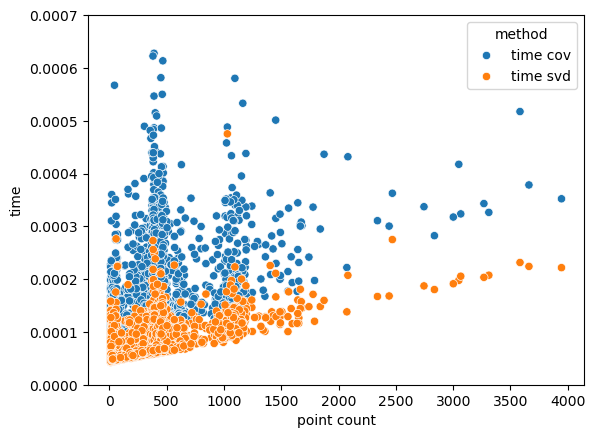

In [48]:
# Clip 
sns.scatterplot(data=df2, x='point count', y='time', hue='method').set(ylim=(0, 0.0007))

In [51]:
df["file id"] = df["file idx"].astype(str) # .str.zfill(2)

In [54]:
# Bahnsteig: 29; Gleis hohe Intensität: 11; Weiche B: 16; Unterirdischer Bhf: 20; Gleis weit abseits: 23; Betondeckel: 28; Zug run 14 A (in run24 Achszähler): 6; 
# Viele Gleise: 33; Anfang Weiche: 34; OLA gleiche H: 35; Y: 37

datei_idx = 16 # [0, 1, 16, 33, 23, 34, 16]

mapping = {
    0: '2 Gleise',
    1: '2 Gleise quer',
    33: 'Viele Gleise',
    23: 'Gleis weit abseits',
    34: 'Weiche Anfang',
    16: 'Weiche'
}

df["Datei"] = df["file idx"].map(mapping)
df2["Datei"] = df2["file idx"].map(mapping)

In [55]:
df.sort_values('Datei', inplace=True)

[(0.0, 0.0007)]

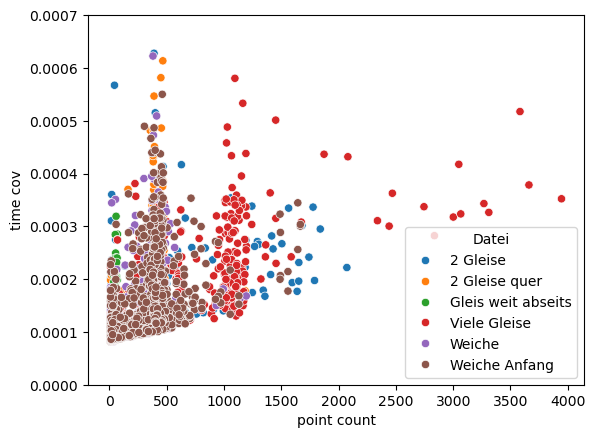

In [56]:
sns.scatterplot(data=df, x='point count', y='time cov', hue='Datei').set(ylim=(0, 0.0007))

[(0.0, 0.0007)]

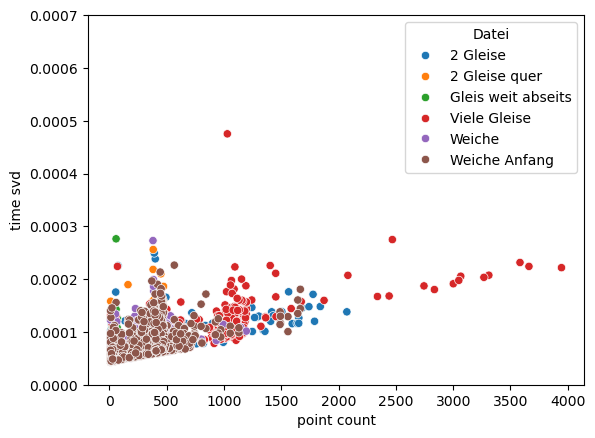

In [57]:
sns.scatterplot(data=df, x='point count', y='time svd', hue='Datei').set(ylim=(0, 0.0007))

In [58]:
mapping.values()

dict_values(['2 Gleise', '2 Gleise quer', 'Viele Gleise', 'Gleis weit abseits', 'Weiche Anfang', 'Weiche'])

[(0.0, 0.0007), (0.0, 4000.0)]

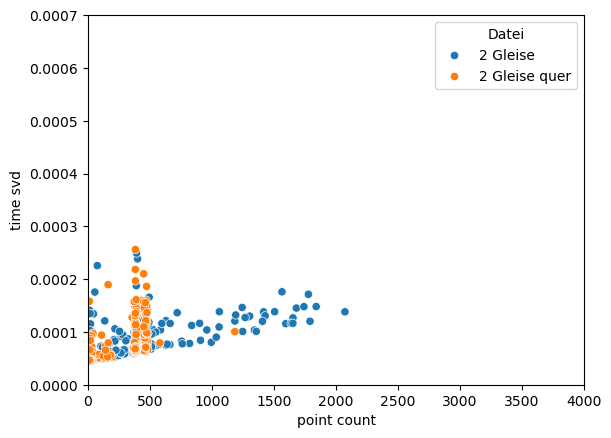

In [59]:
mask = df['Datei'].isin(['2 Gleise', '2 Gleise quer']) 
sns.scatterplot(data=df[mask], x='point count', y='time svd', hue='Datei').set(ylim=(0, 0.0007), xlim=(0, 4000))

[(0.0, 0.0007), (0.0, 4000.0)]

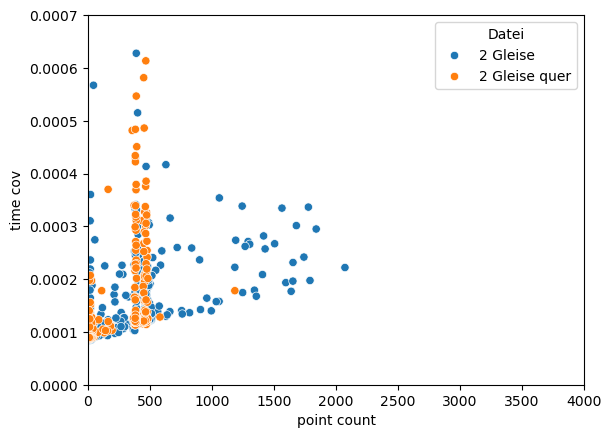

In [60]:
mask = df['Datei'].isin(['2 Gleise', '2 Gleise quer']) 
sns.scatterplot(data=df[mask], x='point count', y='time cov', hue='Datei').set(ylim=(0, 0.0007), xlim=(0, 4000))

[(0.0, 0.0007), (0.0, 4000.0)]

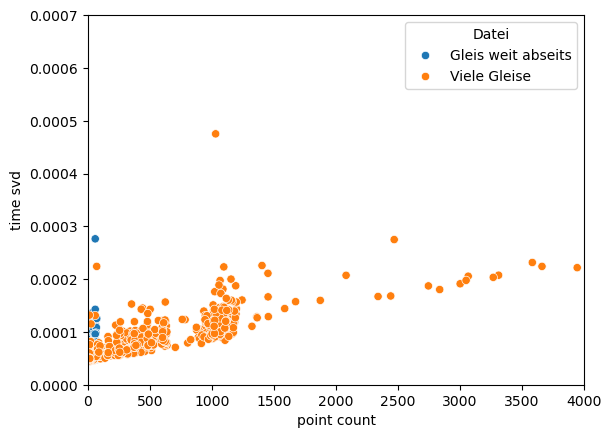

In [61]:
mask = df['Datei'].isin(['Viele Gleise', 'Gleis weit abseits']) 
sns.scatterplot(data=df[mask], x='point count', y='time svd', hue='Datei').set(ylim=(0, 0.0007), xlim=(0, 4000))

[(0.0, 0.0007), (0.0, 4000.0)]

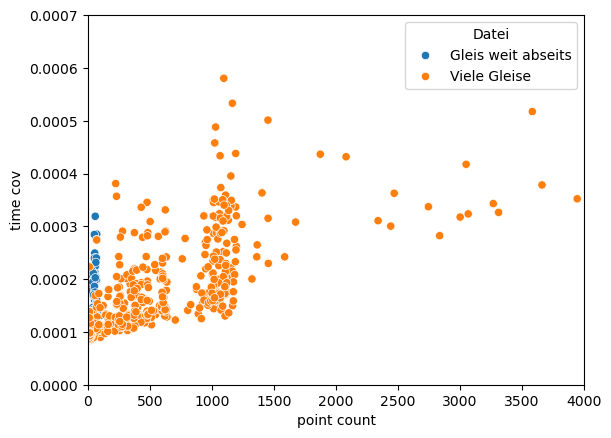

In [62]:
mask = df['Datei'].isin(['Viele Gleise', 'Gleis weit abseits']) 
sns.scatterplot(data=df[mask], x='point count', y='time cov', hue='Datei').set(ylim=(0, 0.0007), xlim=(0, 4000))

[(0.0, 0.0007), (0.0, 4000.0)]

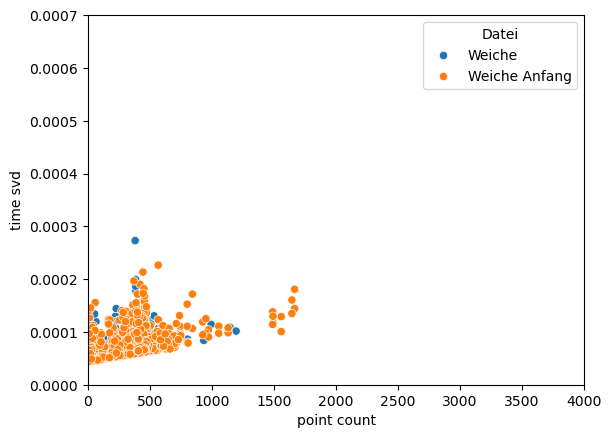

In [63]:
mask = df['Datei'].isin(['Weiche Anfang', 'Weiche']) 
sns.scatterplot(data=df[mask], x='point count', y='time svd', hue='Datei').set(ylim=(0, 0.0007), xlim=(0, 4000))

[(0.0, 0.0007), (0.0, 4000.0)]

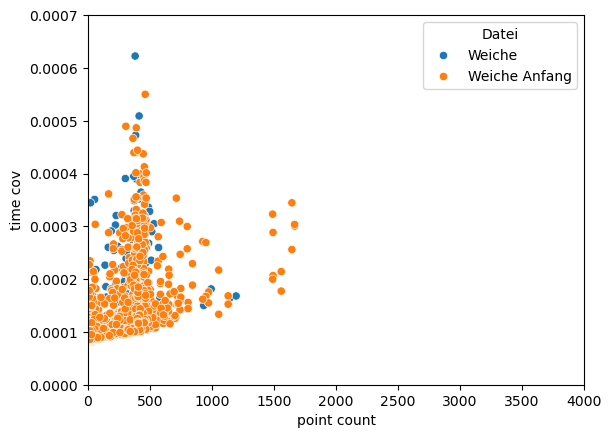

In [64]:
mask = df['Datei'].isin(['Weiche Anfang', 'Weiche']) 
sns.scatterplot(data=df[mask], x='point count', y='time cov', hue='Datei').set(ylim=(0, 0.0007), xlim=(0, 4000))

In [72]:
dfg = df.groupby('Datei').aggregate(
    {'file idx': 'count', 'time svd': 'sum', 'time cov': 'sum'}
)

dfg.rename(columns={'file idx': 'count'}, inplace=True)
dfg["diff"] = dfg["time cov"] - dfg["time svd"]
dfg

,count,time svd,time cov,diff
Datei,,,,
2 Gleise,361,0.029595,0.063821,0.034226
2 Gleise quer,232,0.019135,0.039434,0.020298
Gleis weit abseits,177,0.012259,0.024601,0.012342
Viele Gleise,677,0.056422,0.108138,0.051716
Weiche,703,0.046680,0.092052,0.045372
Weiche Anfang,1462,0.100184,0.197595,0.097412


In [68]:
df 

,file idx,seed point idx,point count,time cov,time svd,file id,Datei,cov mu s,svd mu s
867,0,75,406,0.000192,0.000089,0,2 Gleise,192.403793,88.691711
932,0,136,451,0.000213,0.000098,0,2 Gleise,212.907791,97.990036
931,0,135,20,0.000092,0.000047,0,2 Gleise,91.791153,46.968460
930,0,135,399,0.000219,0.000095,0,2 Gleise,219.345093,95.129013
929,0,134,447,0.000202,0.000098,0,2 Gleise,202.178955,97.751617
...,...,...,...,...,...,...,...,...,...
484,34,209,400,0.000119,0.000064,34,Weiche Anfang,118.970871,64.134598
483,34,208,404,0.000118,0.000064,34,Weiche Anfang,118.017197,63.657761
482,34,207,407,0.000116,0.000064,34,Weiche Anfang,116.348267,64.134598
480,34,206,15,0.000086,0.000045,34,Weiche Anfang,86.069107,44.822693
